### pandas 라이브러리와 탐색적 데이터 분석 과정 익히기

> 다양한 데이터 분석 케이스를 통해 데이터 분석과 pandas 라이브러리 활용에 대해 익히보기로 합니다.

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="4em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석</font><br>

### 전체 판매 프로세스
1. 해당 쇼핑몰에 중소업체가 계약을 맺고
2. 중소업체가 해당 쇼핑몰에 직접 상품을 올리고
2. 고객이 구매하면, 중소업체가 Olist가 제공하는 물류 파트너를 활용해서 배송을 하고,
3. 고객이 상품을 받으면, 고객에게 이메일 survey 가 전송되고,
4. 고객이 이메일 survey 에 별점과 커멘트를 남겨서 제출하게 됨
    
### 데이터 출처
- 브라질에서 가장 큰 백화점의 이커머스 쇼핑몰 (https://olist.com/)
  - 2016년도부터 2018년도 9월까지의 100k 개의 구매 데이터 정보
  - 구매 상태, 가격, 지불수단, 물류 관련, 리뷰관련, 상품 정보, 구매자 지역 관련 정보

### 주요 질문(탐색하고자 하는 질문 리스트)
- 얼마나 많은 고객이 있는가?
- 고객은 어디에 주로 사는가?
- 고객은 주로 어떤 지불방법을 사용하는가?
- **평균 거래액은 얼마일까?**
- 일별, 주별, 월별 판매 트렌드는?
- 어떤 카테고리가 가장 많은 상품이 팔렸을까?
</div>

In [1]:
import pandas as pd
PATH = "00_data/"

In [2]:
products = pd.read_csv(PATH + "olist_products_dataset.csv", encoding='utf-8-sig')
customers = pd.read_csv(PATH + "olist_customers_dataset.csv", encoding='utf-8-sig')
geolocation = pd.read_csv(PATH + "olist_geolocation_dataset.csv", encoding='utf-8-sig')
order_items = pd.read_csv(PATH + "olist_order_items_dataset.csv", encoding='utf-8-sig')
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
reviews = pd.read_csv(PATH + "olist_order_reviews_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
sellers = pd.read_csv(PATH + "olist_sellers_dataset.csv", encoding='utf-8-sig')
category_name = pd.read_csv(PATH + "product_category_name_translation.csv", encoding='utf-8-sig')

### 1. 평균 거래액은 얼마일까?

> 월별 평균 거래액 분석

### 1.1. 데이터 분석 전 해야할 일
- Data cleansing or data cleaning
- 가장 기본적인 것은 없는 데이터를 확인하는 일

In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [5]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

> orders 의 구매 날짜와 payments 의 총 구매 금액을 가지고 월별 평균 거래액 분석을 하기로 함

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### 없는 데이터 확인하기
- isnull().sum() 사용

In [8]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### 모든 데이터가 있는 데이터만 공식적인 데이터로 사용하기로 함
- 없는 데이터 삭제하기

In [9]:
orders = orders.dropna()

In [10]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


- payments 는 없는 데이터가 없는 상태

In [14]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### orders 와 payments 사이즈 비교

In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


#### order_id 중 중복된 데이터가 있는지 확인
- value_counts(): 각 값이 전체에서 중복된 횟수를 리턴 (unique할 경우, 1을 리턴)
- max(): 최대값 가져오기
- value_counts().max(): 최대 중복된 데이터의 횟수 리턴

In [19]:
orders['order_id'].value_counts().max()

1

In [20]:
payments['order_id'].value_counts().max()

29

In [21]:
payments['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
ee9ca989fc93ba09a6eddc250ce01742    19
                                    ..
443c3a064cdbe69048772620883f6b8d     1
4bef799000dee0ad92c4b0397f9d16ed     1
abba5f10cc4fc60d330b2cf362306d1a     1
3611e9793009655c4d1350655211953c     1
485eacbde792f619c98700dab1918163     1
Name: order_id, Length: 99440, dtype: int64

In [22]:
payments[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_sequential payment_type  \
4885    fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
9985    fa65dad1b0e818e3ccc5cb0e39231352                   4      voucher   
14321   fa65dad1b0e818e3ccc5cb0e39231352                   1      voucher   
17274   fa65dad1b0e818e3ccc5cb0e39231352                   9      voucher   
19565   fa65dad1b0e818e3ccc5cb0e39231352                  10      voucher   
23074   fa65dad1b0e818e3ccc5cb0e39231352                   2      voucher   
24879   fa65dad1b0e818e3ccc5cb0e39231352                  25      voucher   
28330   fa65dad1b0e818e3ccc5cb0e39231352                   5      voucher   
29648   fa65dad1b0e818e3ccc5cb0e39231352                   6      voucher   
32519   fa65dad1b0e818e3ccc5cb0e39231352                  11      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
39108   fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   
39111   fa65dad1b0e818e3ccc5cb0e39231352                  28      voucher   
63369   fa65dad1b0e818e3ccc5cb0e39231352                  15      voucher   
65641   fa65dad1b0e818e3ccc5cb0e39231352                   3      voucher   
68853   fa65dad1b0e818e3ccc5cb0e39231352                   8      voucher   
73537   fa65dad1b0e818e3ccc5cb0e39231352                  12      voucher   
74239   fa65dad1b0e818e3ccc5cb0e39231352                  21      voucher   
74721   fa65dad1b0e818e3ccc5cb0e39231352                  19      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
78050   fa65dad1b0e818e3ccc5cb0e39231352                  16      voucher   
79587   fa65dad1b0e818e3ccc5cb0e39231352                  26      voucher   
79670   fa65dad1b0e818e3ccc5cb0e39231352                  17      voucher   
80321   fa65dad1b0e818e3ccc5cb0e39231352                  18      voucher   
82593   fa65dad1b0e818e3ccc5cb0e39231352                   7      voucher   
85166   fa65dad1b0e818e3ccc5cb0e39231352                  23      voucher   
93337   fa65dad1b0e818e3ccc5cb0e39231352                  20      voucher   
99213   fa65dad1b0e818e3ccc5cb0e39231352                  24      voucher   
100606  fa65dad1b0e818e3ccc5cb0e39231352                  22      voucher   

        payment_installments  payment_value  
4885                       1          66.02  
9985                       1          29.16  
14321                      1           3.71  
17274                      1           1.08  
19565                      1          12.86  
23074                      1           8.51  
24879                      1           3.68  
28330                      1           0.66  
29648                      1           5.02  
32519                      1           4.03  
36822                      1           0.00  
39108                      1          19.26  
39111                      1          29.05  
63369                      1          14.04  
65641                      1           2.95  
68853                      1          26.02  
73537                      1           3.60  
74239                      1           4.11  
74721                      1           5.02  
77885                      1           0.00  
78050                      1          12.86  
79587                      1          28.27  
79670                      1           3.72  
80321                      1           0.73  
82593                      1           0.32  
85166                      1          18.86  
93337                      1         150.00  
99213                      1           0.42  
100606                     1           4.03

#### 중복된 order_id 에 대한 지불 가격을 합치기로 함
> 중복된 order_id 에 대해 orders 필드값이 덮어씌워져서 본래 orders 보다 많은 행이 생긴 것임

In [23]:
payments = payments.groupby('order_id').sum()
payments[payments.index == 'fa65dad1b0e818e3ccc5cb0e39231352']

payment_sequential  payment_installments  \
order_id                                                                     
fa65dad1b0e818e3ccc5cb0e39231352                 435                    29   

                                  payment_value  
order_id                                         
fa65dad1b0e818e3ccc5cb0e39231352         457.99

#### orders 의 구매 날짜와 payments 의 총 지불 금액을 합침

In [25]:
merged_order = pd.merge(orders, payments, on='order_id')

In [26]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96460 entries, 0 to 96459
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96460 non-null  object 
 1   customer_id                    96460 non-null  object 
 2   order_status                   96460 non-null  object 
 3   order_purchase_timestamp       96460 non-null  object 
 4   order_approved_at              96460 non-null  object 
 5   order_delivered_carrier_date   96460 non-null  object 
 6   order_delivered_customer_date  96460 non-null  object 
 7   order_estimated_delivery_date  96460 non-null  object 
 8   payment_sequential             96460 non-null  int64  
 9   payment_installments           96460 non-null  int64  
 10  payment_value                  96460 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 8.8+ MB


In [28]:
merged_order[merged_order['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, payment_sequential, payment_installments, payment_value]
Index: []

In [29]:
orders[orders['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352']

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

### 1.2 pandas 로 날짜 다루기

#### 시계열 자료와 pandas
- 년도별, 월별, 일별, 시별, 분별 초별등 시간의 흐름에 따라 관측된 자료
- pandas 에서 시계열 자료를 손쉽게 다룰 수 있도록, datetime (datetime64) 자료형 제공
  - pandas.to_datetime() 함수를 사용해서, 날짜와 시간을 나타내는 문자열을 datetime (datetime64) 자료형으로 변경 가능

#### pandas.to_datetime() 사용법
- 문자열 타입의 시간을 pandas 의 datetime (datetime64) 형으로 변경 
- 주요 사용법
  - Series 변수 = to_datetime(Series 변수)
    - return 된 Series 변수 데이터는 datetime64 형으로 변형되어 저장
  - Series 변수 = to_datetime(Series 변수, format='~~~')
    - Series 에 변환될 문자열이 특별한 포맷을 가져서, 자동변환이 어려운 경우 명시적으로 format 지정 (옵션)
  - Series 변수 = to_datetime(Series 변수, errors='raise')
    - 디폴트 raise
    - errors 가능한 값: ignore(무시), raise(에러 발생), coerce(NaT 로 값 변경해서 저장) (옵션)


| 표시 | 의미                                |
|------|:-------------------------------------|
| %y   | 연도를 축약해서 표시, 예: 21        |
| %Y   | 연도를 축약하지 않고 표시, 예: 2021 |
| %m   | 월을 두자릿 수로 표시, 예: 01 ~ 12  |
| %d   | 일을 두자릿 수로 표시, 예: 01 ~ 31  |
| %H   | 시간 표시(24시간), 예: 00 ~ 23        |
| %M   | 분 표시, 예: 00 ~ 59  |
| %S   | 초 표시, 예: 00 ~ 59        |

> 참고: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [32]:
import pandas as pd
df = pd.DataFrame({'order':['2020-01-01 07:10:00',
                            '2020-01-08 07:20:30',
                            '2020-02-20 11:20:00',
                            '2020-02-20 04:40:50',
                            '2020-02-28 12:10:20',
                            '2019-01-10 17:23:50',
                            '2019-06-20 22:27:50',
                            '2019-06-20 21:15:59',
                            '2019-12-10 21:15:59',
                           ]})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   order   9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [34]:
df['order'] = pd.to_datetime(df['order'], format='%Y-%m-%d %H:%M:%S', errors='raise') 
#df['order'] = pd.to_datetime(df['order'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   order   9 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 200.0 bytes


### order 한 시간 정보 데이터만 datetime64 로 변환하기

In [38]:
# 지금까지 작성한 부분을 한데 모아서 한번에 실행 (주피터 노트북 중간부터 들으신다면...)
import pandas as pd
PATH = "00_data/"
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
orders = orders.dropna()
payments = payments.groupby('order_id').sum()
merged_order = pd.merge(orders, payments, on='order_id')

In [39]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96460 entries, 0 to 96459
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96460 non-null  object 
 1   customer_id                    96460 non-null  object 
 2   order_status                   96460 non-null  object 
 3   order_purchase_timestamp       96460 non-null  object 
 4   order_approved_at              96460 non-null  object 
 5   order_delivered_carrier_date   96460 non-null  object 
 6   order_delivered_customer_date  96460 non-null  object 
 7   order_estimated_delivery_date  96460 non-null  object 
 8   payment_sequential             96460 non-null  int64  
 9   payment_installments           96460 non-null  int64  
 10  payment_value                  96460 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 8.8+ MB


In [41]:
merged_order.head(1)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date  payment_sequential  payment_installments  \
0           2017-10-18 00:00:00                   6                     3   

   payment_value  
0          38.71

In [42]:
merged_order['order_purchase_timestamp'] = pd.to_datetime(merged_order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise') 

In [43]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96460 entries, 0 to 96459
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96460 non-null  object        
 1   customer_id                    96460 non-null  object        
 2   order_status                   96460 non-null  object        
 3   order_purchase_timestamp       96460 non-null  datetime64[ns]
 4   order_approved_at              96460 non-null  object        
 5   order_delivered_carrier_date   96460 non-null  object        
 6   order_delivered_customer_date  96460 non-null  object        
 7   order_estimated_delivery_date  96460 non-null  object        
 8   payment_sequential             96460 non-null  int64         
 9   payment_installments           96460 non-null  int64         
 10  payment_value                  96460 non-null  float64       
dtypes: datetime64[n

### pandas.DataFrame.copy
- 데이터프레임 중 일부를 선택 후, 조작하면 해당 데이터프레임도 변경
- copy() 를 통해, 복사본을 만들어서 조작하여, 원본 데이터프레임은 보존 가능

In [44]:
merged_order_payment_date = merged_order[['order_purchase_timestamp', 'payment_value']].copy()

In [45]:
merged_order_payment_date.head()

order_purchase_timestamp  payment_value
0      2017-10-02 10:56:33          38.71
1      2018-07-24 20:41:37         141.46
2      2018-08-08 08:38:49         179.12
3      2017-11-18 19:28:06          72.20
4      2018-02-13 21:18:39          28.62

### pandas.Grouper
- pandas groupby 명령에 보다 세부적인 grouping 이 가능토록 하는 명령
- pandas groupby 함수와 함께 쓰여서, 시간별로 데이터를 분류할 수 있는 기능
- 특정 시간별로 grouping 할 수 있음

```
데이터프레임.groupby(pd.Groper(key='그루핑기준이되는 컬럼', freq='세부 기준'))

```

> freq 옵션: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

### 1.3. 시간대별 거래액 확인하기

### 1.3.1. 월별 거래액 확인하기

In [46]:
merged_order_month_sum = merged_order_payment_date.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).sum() # key 는 기본이 index 임
merged_order_month_sum.head()

payment_value
order_purchase_timestamp               
2016-10-31                     47271.20
2016-11-30                         0.00
2016-12-31                        19.62
2017-01-31                    127430.74
2017-02-28                    269458.98

### 시각화해서 트렌드 확인하기

In [47]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [48]:
merged_order_month_sum.iplot(kind='bar', theme='white')

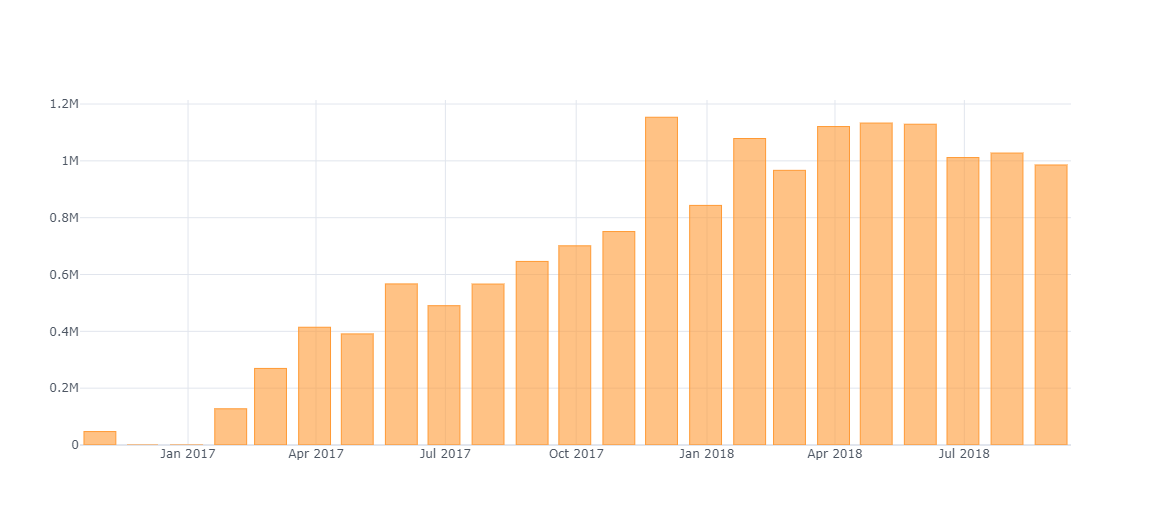

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
    <font size="3em" style="font-weight:bold;color:#3f8dbf;">월별 평균 거래액</font>
</div>

In [49]:
merged_order_month_sum['payment_value'].mean()

670420.9934782614

In [50]:
merged_order_month_sum.tail()

payment_value
order_purchase_timestamp               
2018-04-30                   1132933.95
2018-05-31                   1128836.69
2018-06-30                   1011561.35
2018-07-31                   1027383.10
2018-08-31                    985414.28

In [51]:
merged_order_month_sum.head()

payment_value
order_purchase_timestamp               
2016-10-31                     47271.20
2016-11-30                         0.00
2016-12-31                        19.62
2017-01-31                    127430.74
2017-02-28                    269458.98

In [55]:
merged_order_month_sum['payment_value'][3:].mean()

768619.6015000007

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
    <font size="3em" style="font-weight:bold;color:#3f8dbf;">최대 거래액을 기록한 월</font>
</div>

In [58]:
merged_order_month_sum[merged_order_month_sum['payment_value'] == merged_order_month_sum['payment_value'].max()]

payment_value
order_purchase_timestamp               
2017-11-30                   1153393.22

### 1.4. 월별 거래액 시각화 
- 현업 수준의 디테일이 살아 있는 그래프 그려보기

### 지금까지의 데이터 전처리

In [1]:
# 지금까지 작성한 부분을 한데 모아서 한번에 실행 (주피터 노트북 중간부터 들으신다면...)
import pandas as pd
PATH = "00_data/"
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
orders = orders.dropna()
payments = payments.groupby('order_id').sum()
merged_order = pd.merge(orders, payments, on='order_id')
merged_order['order_purchase_timestamp'] = pd.to_datetime(merged_order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise') 
merged_order_payment_date = merged_order[['order_purchase_timestamp', 'payment_value']].copy()
merged_order_month_sum = merged_order_payment_date.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).sum() # key 는 기본이 index 임

#### 1. plotly 로 세부적인 부분까지 수정해보기

In [3]:
merged_order_month_sum

payment_value
order_purchase_timestamp               
2016-10-31                     47271.20
2016-11-30                         0.00
2016-12-31                        19.62
2017-01-31                    127430.74
2017-02-28                    269458.98
2017-03-31                    414369.39
2017-04-30                    390952.18
2017-05-31                    566872.73
2017-06-30                    490225.60
2017-07-31                    566403.93
2017-08-31                    646000.61
2017-09-30                    700976.01
2017-10-31                    751140.27
2017-11-30                   1153393.22
2017-12-31                    843199.17
2018-01-31                   1078606.86
2018-02-28                    966554.97
2018-03-31                   1120678.00
2018-04-30                   1132933.95
2018-05-31                   1128836.69
2018-06-30                   1011561.35
2018-07-31                   1027383.10
2018-08-31                    985414.28

- 각 필드 확인: https://plotly.com/python/reference/

In [4]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=merged_order_month_sum.index, 
        y=merged_order_month_sum['payment_value'], 
        text=merged_order_month_sum['payment_value'], 
        textposition='auto', 
        texttemplate='R$ %{text:.0f}'
    )
)

fig.update_layout(
    {
        "title": {
            "text": "<b>Turnover per Month in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Oct. 2016 to Sep. 2018",
            "showticklabels":True,
            "dtick": "M1",
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "Turnover per Month"
        }
    }
)

fig.show()

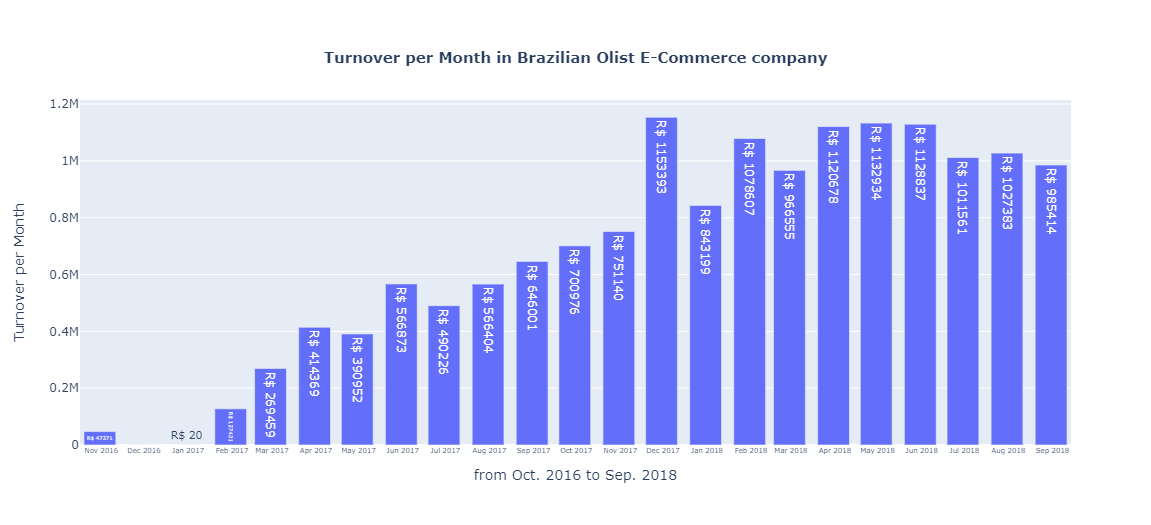

#### 2. 불필요한 데이터 삭제

In [5]:
merged_order_month_sum_from2017 = merged_order_month_sum[merged_order_month_sum.index > '2017-01-01']
merged_order_month_sum_from2017

payment_value
order_purchase_timestamp               
2017-01-31                    127430.74
2017-02-28                    269458.98
2017-03-31                    414369.39
2017-04-30                    390952.18
2017-05-31                    566872.73
2017-06-30                    490225.60
2017-07-31                    566403.93
2017-08-31                    646000.61
2017-09-30                    700976.01
2017-10-31                    751140.27
2017-11-30                   1153393.22
2017-12-31                    843199.17
2018-01-31                   1078606.86
2018-02-28                    966554.97
2018-03-31                   1120678.00
2018-04-30                   1132933.95
2018-05-31                   1128836.69
2018-06-30                   1011561.35
2018-07-31                   1027383.10
2018-08-31                    985414.28

In [9]:
merged_order_month_sum_from2017 = merged_order_month_sum[3:]
merged_order_month_sum_from2017

payment_value
order_purchase_timestamp               
2017-01-31                    127430.74
2017-02-28                    269458.98
2017-03-31                    414369.39
2017-04-30                    390952.18
2017-05-31                    566872.73
2017-06-30                    490225.60
2017-07-31                    566403.93
2017-08-31                    646000.61
2017-09-30                    700976.01
2017-10-31                    751140.27
2017-11-30                   1153393.22
2017-12-31                    843199.17
2018-01-31                   1078606.86
2018-02-28                    966554.97
2018-03-31                   1120678.00
2018-04-30                   1132933.95
2018-05-31                   1128836.69
2018-06-30                   1011561.35
2018-07-31                   1027383.10
2018-08-31                    985414.28

In [10]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=merged_order_month_sum_from2017.index, 
        y=merged_order_month_sum_from2017['payment_value'], 
        text=merged_order_month_sum_from2017['payment_value'], 
        textposition='auto', 
        texttemplate='R$ %{text:.0f}'
    )
)

fig.update_layout(
    {
        "title": {
            "text": "<b>Turnover per Month in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Jan. 2017 to Sep. 2018",
            "showticklabels":True,
            "dtick": "M1",
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "Turnover per Month"
        }
    }
)

fig.show()

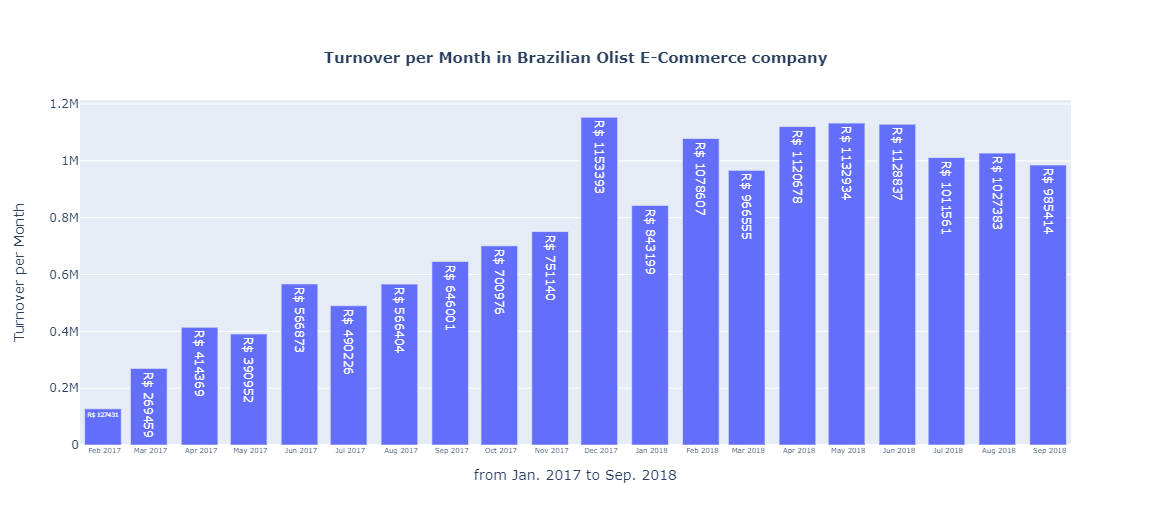

#### 3. 그래프 테마 변경해보기

In [12]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [13]:
import plotly.graph_objects as go
for template in pio.templates:
    fig = go.Figure()
    fig.add_trace(
        go.Bar(
            x=merged_order_month_sum_from2017.index, 
            y=merged_order_month_sum_from2017['payment_value'], 
            text=merged_order_month_sum_from2017['payment_value'], 
            textposition='auto', 
            texttemplate='R$ %{text:.0f}'
        )
    )
    fig.update_layout(
        {
            "title": {
                "text": "<b>Turnover per Month in Brazilian Olist E-Commerce company</b> by " + template,
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "from Feb. 2017 to Sep. 2018",
                "showticklabels":True,
                "tick0": "2017-01-31", # 처음 tick 을 설정을 해주지 않을 경우, x 축이 밀리는 경우가 있음
                "dtick": "M1", # 한 달 단위로 tick 설정
                "tickfont": {
                    "size": 7                
                }
            },
            "yaxis": {
                "title": "Turnover per Month"
            },
            "template":template
        }
    )
    fig.show()

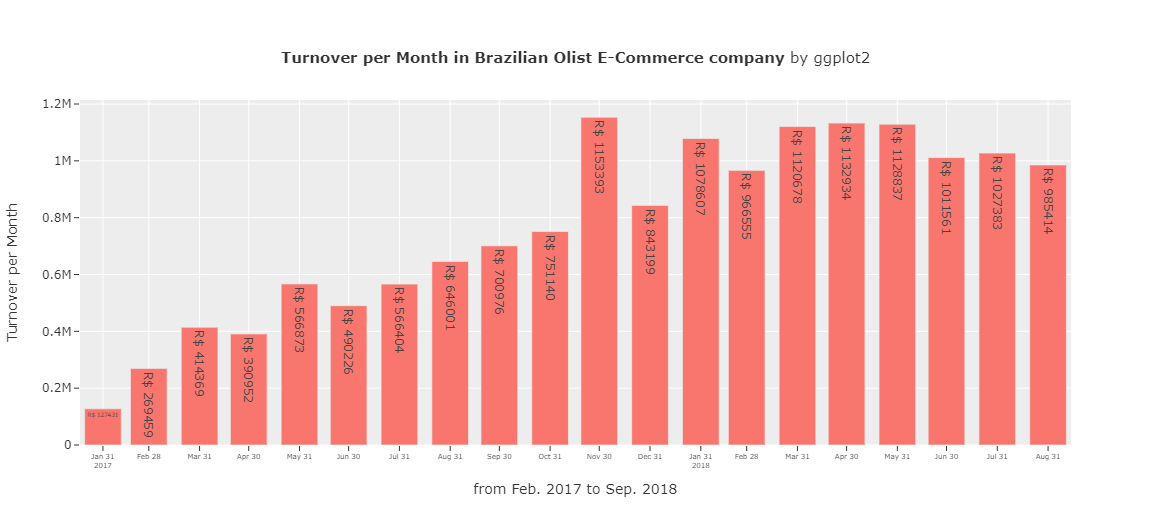

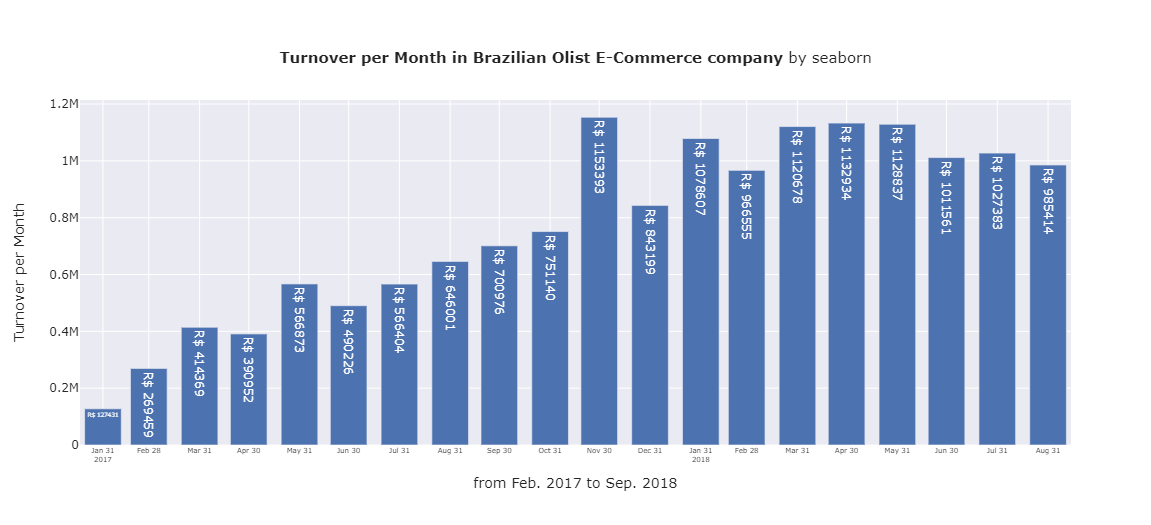

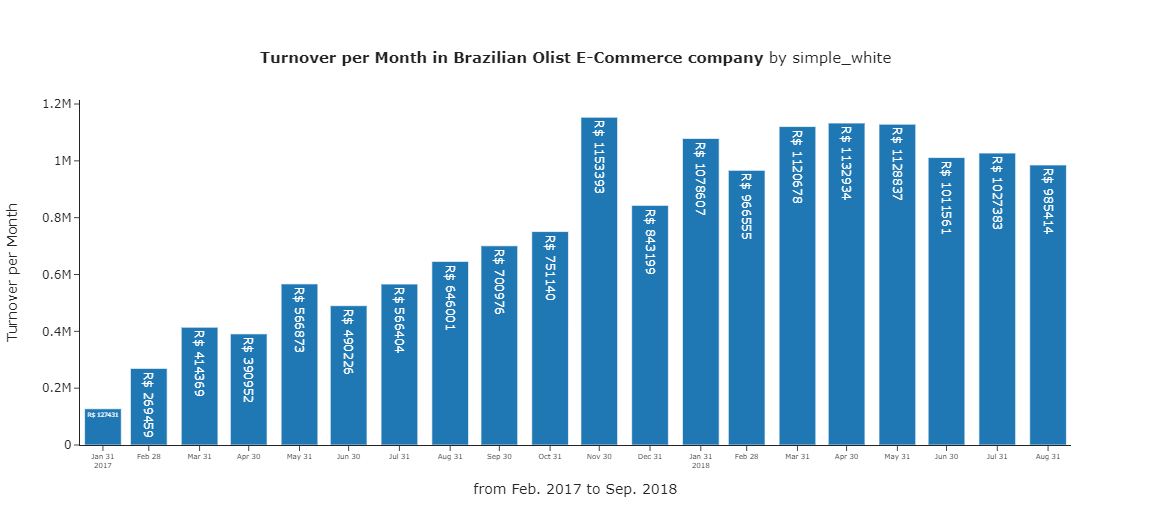

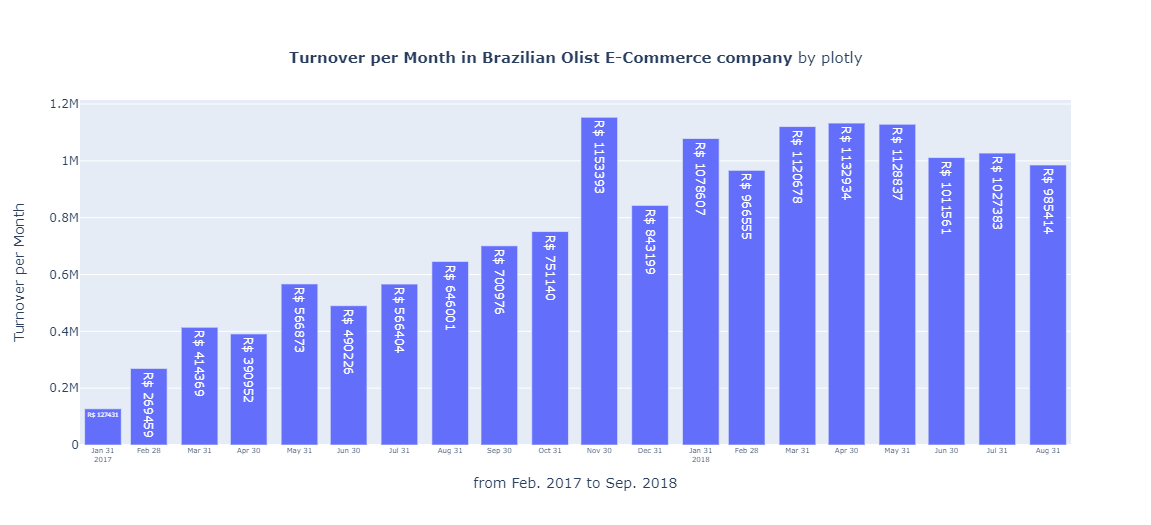

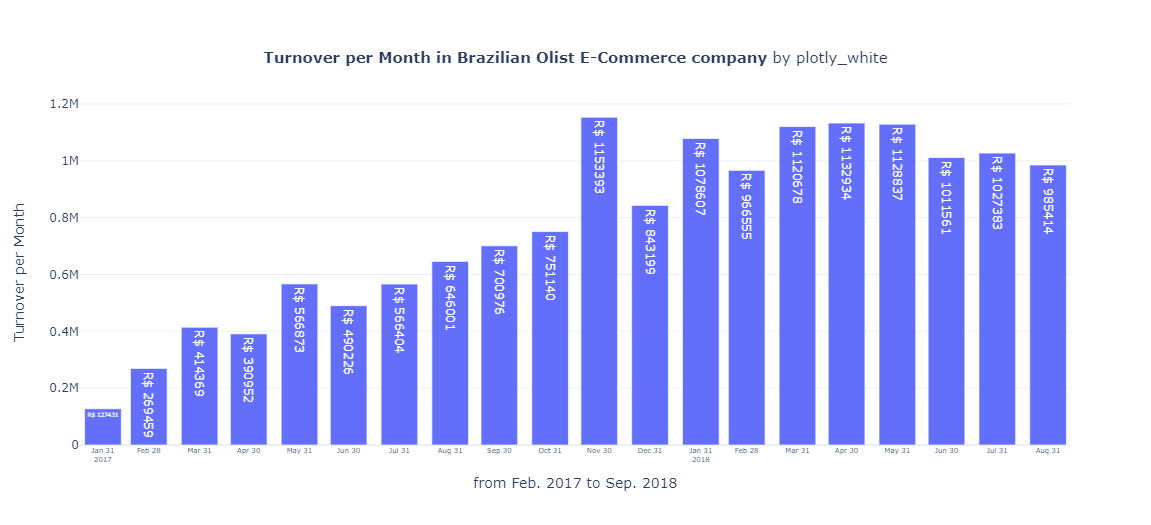

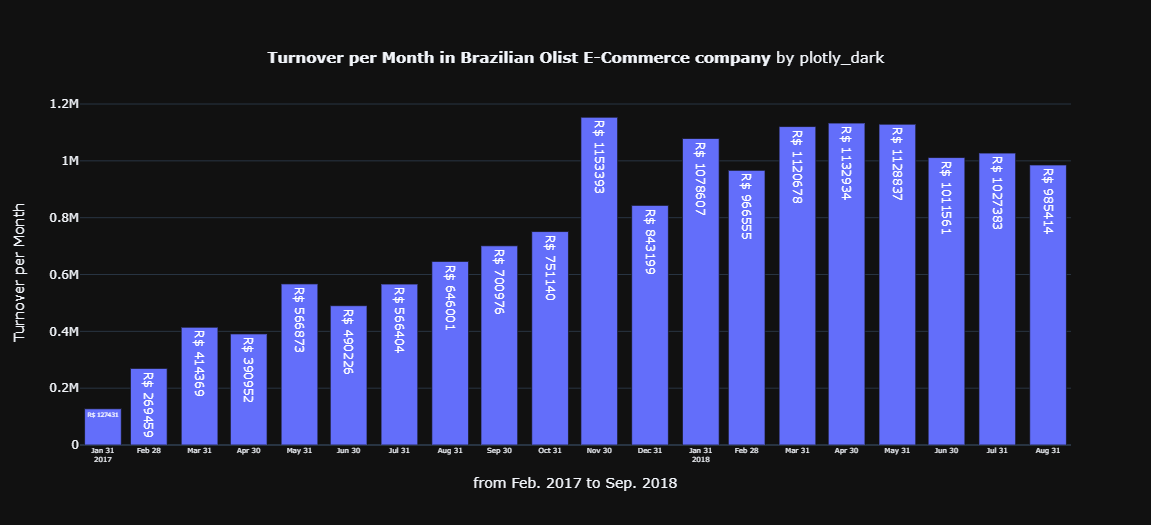

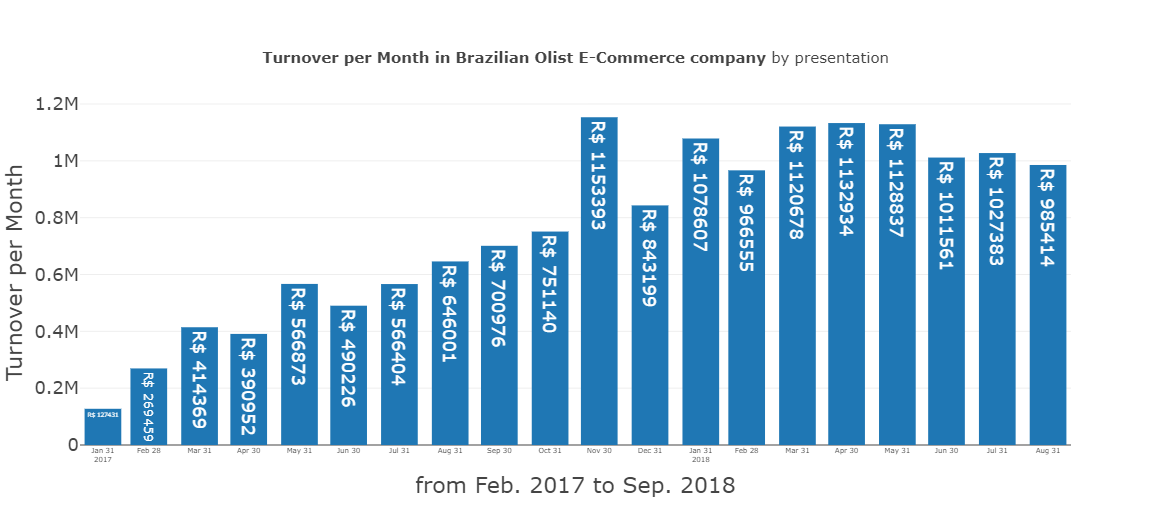

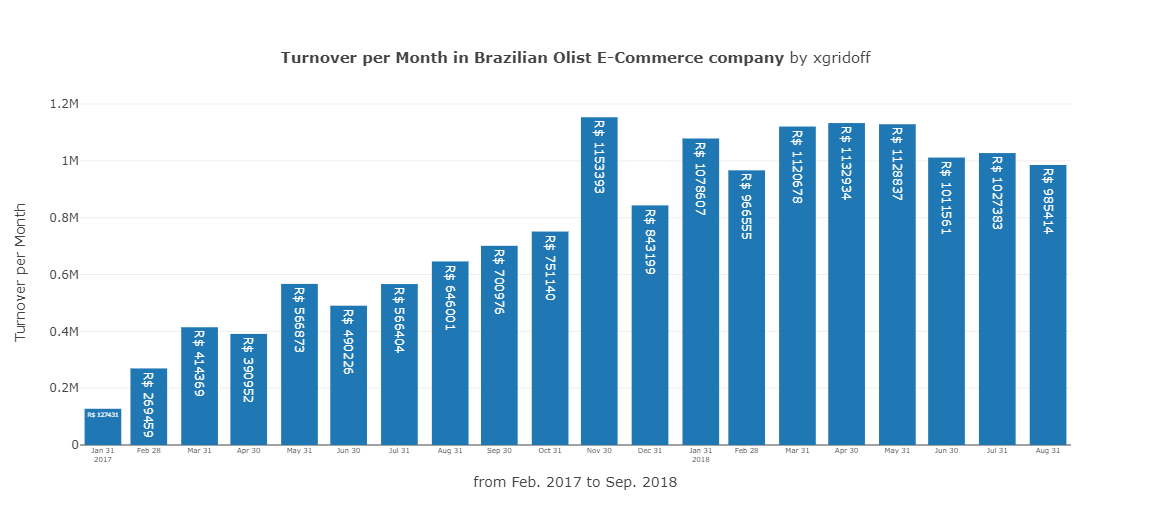

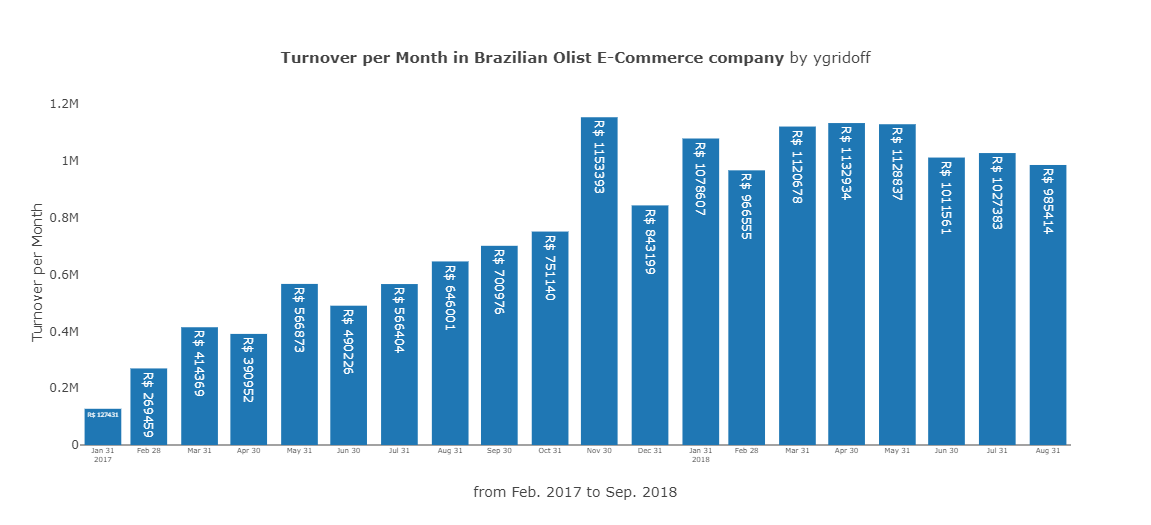

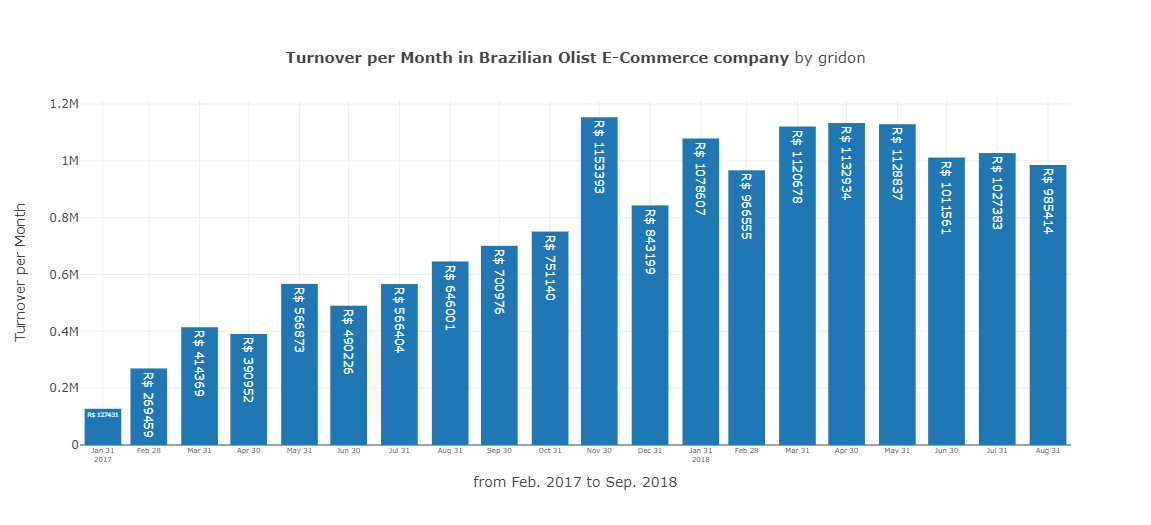

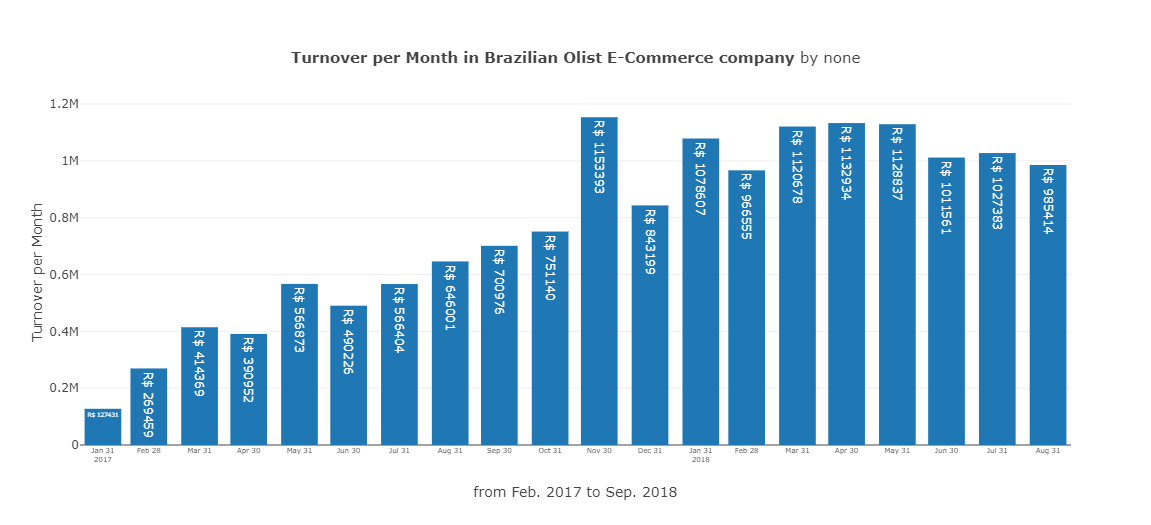

#### 4. 원하는 테마로 최종 선택하기

In [14]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=merged_order_month_sum_from2017.index, 
        y=merged_order_month_sum_from2017['payment_value'], 
        text=merged_order_month_sum_from2017['payment_value'], 
        textposition='auto', 
        texttemplate='R$ %{text:,.0f}'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Turnover per Month in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Jan. 2017 to Sep. 2018",
            "showticklabels":True,
            "tick0": "2017-01-31", # 처음 tick 을 설정을 해주지 않을 경우, x 축이 밀리는 경우가 있음
            "dtick": "M1", # 한 달 단위로 tick 설정
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "Turnover per Month"
        },
        "template":'plotly_white'
    }
)
fig.show()

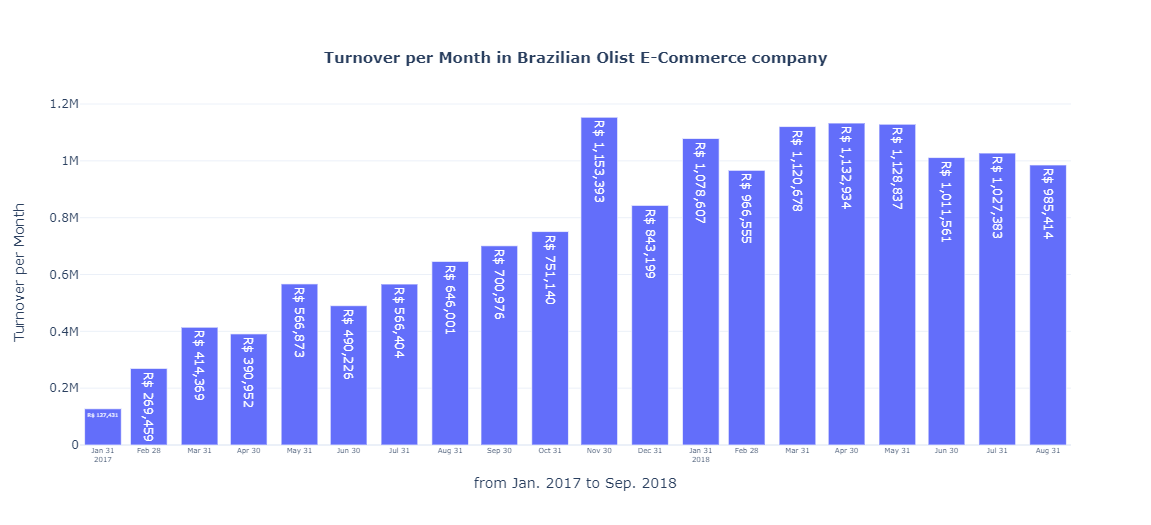

#### 5. bar 색상 바꾸기 (최대 거래액을 가진 달은 별도 색상으로 변경하기)

- 참고 사이트: https://color.adobe.com/ko/trends

In [16]:
colors = ['#03588C',] * len(merged_order_month_sum_from2017.index)
colors[10] = '#F24472'

In [17]:
colors

['#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#F24472',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C',
 '#03588C']

In [18]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=merged_order_month_sum_from2017.index, 
        y=merged_order_month_sum_from2017['payment_value'], 
        text=merged_order_month_sum_from2017['payment_value'], 
        textposition='auto', 
        texttemplate='R$ %{text:,.0f}',
        marker_color=colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Turnover per Month in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Jan. 2017 to Aug. 2018",
            "showticklabels":True,
            "tick0": "2017-01-31",
            "dtick": "M1",
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "Turnover per Month",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)

fig.show()

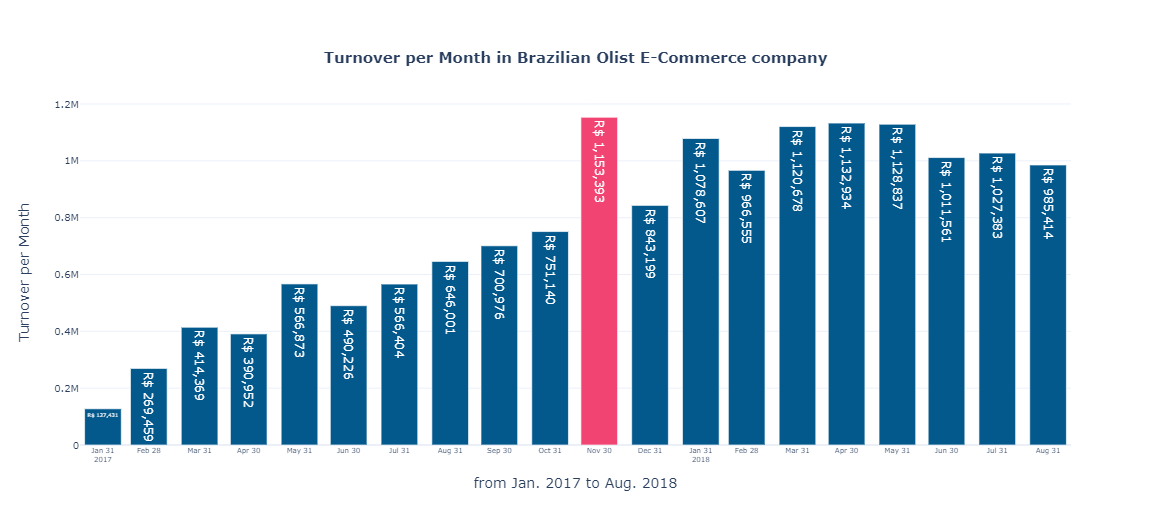

#### 6. annotation 추가하기

- 참고 사이트: https://plotly.com/python/text-and-annotations/
- 상세 옵션: https://plotly.com/python/reference/#layout-annotations

In [19]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=merged_order_month_sum_from2017.index, 
        y=merged_order_month_sum_from2017['payment_value'], 
        text=merged_order_month_sum_from2017['payment_value'], 
        textposition='auto', 
        texttemplate='R$ %{y:,.0f}',
        marker_color=colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Turnover per Month in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Jan. 2017 to Sep. 2018",
            "showticklabels":True,
            "tick0": "2017-01-31",
            "dtick": "M1",
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "Turnover per Month",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)

fig.add_annotation(
            x="2017-11-30",
            y=1153393,
            text="<b>Peaked Monthly Turnover</b>",
            showarrow=True,
            font=dict(
                size=10,
                color="#ffffff"
                ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#77CFD9",
            ax=20,
            ay=-30,
            bordercolor="#77CFD9",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F25D50",
            opacity=0.9
)

fig.show()

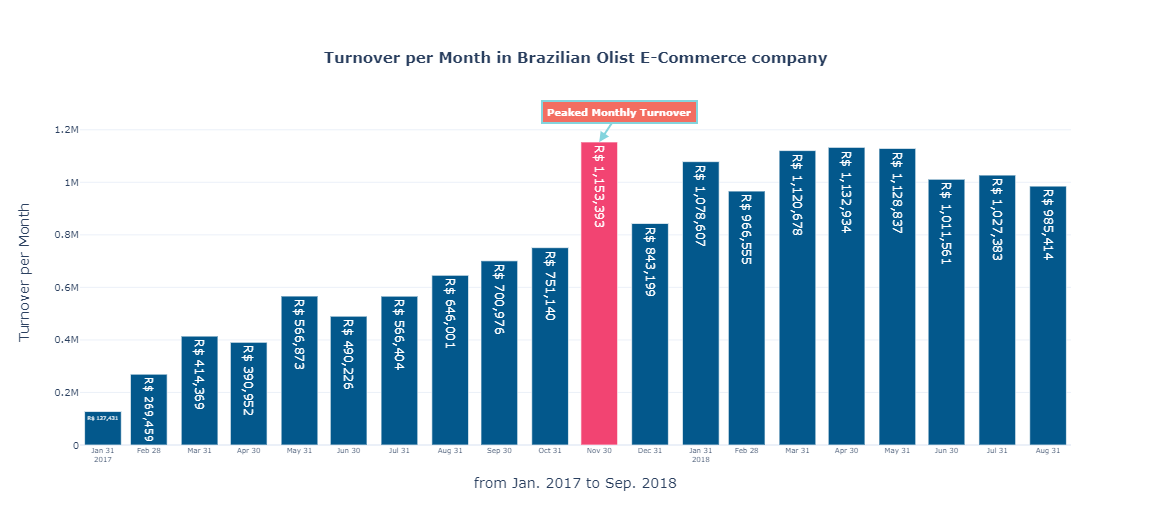